In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [831]:
df = pd.read_csv('cpickles/clean_beer.csv')

In [832]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [833]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24972 entries, 0 to 24971
Data columns (total 133 columns):
 #   Column           Dtype  
---  ------           -----  
 0   title            object 
 1   bstyle           object 
 2   og               float64
 3   fg               float64
 4   abv              float64
 5   ibu              float64
 6   srm              float64
 7   Mash pH          float64
 8   hops             object 
 9   others           object 
 10  water            object 
 11  notes            object 
 12  IBU (rager)      float64
 13  SRM (daniels)    float64
 14  SRM (ebcmorey)   float64
 15  SRM (mosher)     float64
 16  ABV (alternate)  object 
 17  yeast            object 
 18  co2              object 
 19  chal             int64  
 20  citra            int64  
 21  warrior          int64  
 22  casc             int64  
 23  saaz             int64  
 24  azacca           int64  
 25  colum            int64  
 26  mag              int64  
 27  perle          

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


from mlxtend.plotting import plot_decision_regions

from imblearn.over_sampling import RandomOverSampler

In [409]:
y_df = df[['ipa', 'wylon','kveik','omega','us5','us4','chico','yeast_dark','wy1056','wy1272','wlp080','wlp80','gy054','vermont','ylager','ykolsch']].dropna()

KeyError: "['gy054'] not in index"

In [278]:
X = y_df.drop(columns =['ipa'])
y= y_df['ipa']

In [279]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [280]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train,y_train)
X_pre = preprocessing.scale(X)
X_train_pre = preprocessing.scale(X_resampled)
#x_test_pre = preprocessing.scale(x_test_resampled)

In [300]:
from sklearn import preprocessing

In [282]:
X_pre = preprocessing.scale(X)
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [283]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train_pre, y_train)

KNeighborsClassifier(n_neighbors=23)

In [284]:
knn.score(X_train_pre, y_train)

0.7676674648492663

In [285]:
knn.score(x_test_pre,y_test)

0.7721495671394364

In [286]:
knn.predict(x_test_pre)

array([0, 0, 0, ..., 0, 0, 0])

In [287]:
k_range = list(range(1, 61))
param_grid = dict(n_neighbors=k_range)

In [292]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [293]:
# fit the grid with data
grid.fit(X_train_pre, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [289]:
# view the complete results (list of named tuples)
grid.cv_results_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [290]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# examine the first tuple
def examine_first_tuple(model_grid):
    print("std_test_score", model_grid.cv_results_['std_test_score'])
    print("rank_test_score", model_grid.cv_results_['rank_test_score'])
    print("mean_test_score", model_grid.cv_results_['mean_test_score'])
    
examine_first_tuple(grid)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [291]:
grid.best_score_, grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
# examine the best model
def get_best_model(model_grid):
    best_k = model_grid.cv_results_['rank_test_score'][0]
    print (best_k, model_grid.cv_results_['mean_test_score'][best_k], model_grid.cv_results_['std_test_score'][best_ka])

get_best_model(grid)

In [49]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train_pre, y_train)

KNeighborsClassifier(n_neighbors=15)

In [50]:
knn.score(X_train_pre, y_train)

0.7671762755571928

In [51]:
knn.score(x_test_pre,y_test)

0.767544667526248

In [23]:
knn.predict(x_test_pre)

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test_pre)[:,1])

KNN ROC AUC score =  0.5072376777545388


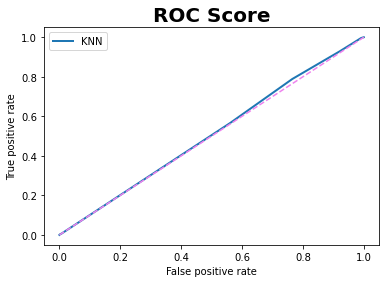

In [53]:

plt.plot(fpr, tpr,lw=2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Score', fontweight="bold", fontsize=20);
plt.legend(['KNN'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))

#### Naive Bayes

In [54]:
bnb = BernoulliNB()
bnb.fit(X_train_pre, y_train)
bnb.score(x_test_pre, y_test)

0.7690182354024683

In [55]:
fprbnb, tprbnb, thresholdsbnb = roc_curve(y_test, bnb.predict_proba(x_test_pre)[:,1])

BNB ROC AUC score =  0.5308136836375097


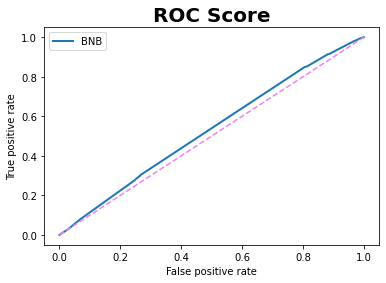

In [56]:

plt.plot(fprbnb, tprbnb,lw=2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Score', fontweight="bold", fontsize=20);
plt.legend(['BNB'])
print("BNB ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test_pre)[:,1]))

### Hops

In [57]:
list(df.columns)

['title',
 'bstyle',
 'og',
 'fg',
 'abv',
 'ibu',
 'srm',
 'Mash pH',
 'hops',
 'others',
 'water',
 'notes',
 'IBU (rager)',
 'SRM (daniels)',
 'SRM (ebcmorey)',
 'SRM (mosher)',
 'ABV (alternate)',
 'yeast',
 'co2',
 'chal',
 'citra',
 'warrior',
 'casc',
 'saaz',
 'azacca',
 'colum',
 'mag',
 'perle',
 'simcoe',
 'amar',
 'cashmere',
 'comet',
 'galaxy',
 'apollo',
 'willam',
 'goldings',
 'heller',
 'fug',
 'nugg',
 'hopshot',
 'tett',
 'mosaic',
 'brewerg',
 'northb',
 'cent',
 'chinook',
 'crystal',
 'magnum',
 'ctz',
 'styr',
 'idaho',
 'nelson',
 'exper',
 'hall',
 'noble',
 'dryh',
 'lact',
 'clone',
 'juicy',
 'dank',
 'wedding',
 'whisk',
 'trop',
 'award',
 'best',
 'smoke',
 'roast',
 'thick',
 'pine',
 'sticky',
 'foam',
 'hoppy',
 'choco',
 'coffee',
 'straw',
 'bisc',
 'dark',
 'heavy',
 'stfruit',
 'hazy',
 'pheno',
 'ester',
 'banana',
 'bitter',
 'clove',
 'sour',
 'wylon',
 'kveik',
 'omega',
 'us5',
 'us4',
 'chico',
 'yeast_dark',
 'wy1056',
 'wy1272',
 'wlp080',

In [804]:
hops = df[['ipa','chal','citra',
 'warrior',
 'casc',
 'saaz',

 'azacca',
 'colum',
 'mag',
 'perle',
 'simcoe',
 'amar',
 'cashmere',
 'comet',
 'galaxy',
 'apollo',
 'willam',
 'goldings',
 'heller',
 'fug',
 'nugg',
 'hopshot',
 'tett',
 'mosaic',
 'brewerg',
 'northb',
 'cent',
 'chinook',
 'crystal',
 'ctz','styr','idaho','nelson','exper','hall','noble','dryh', 'wylon', 'us5', 'us4', 'chico', 'vermont']].dropna()

In [805]:
df.bugu.mean()

0.7208991814231157

In [806]:
X = hops.drop(columns =['ipa'])
y= hops['ipa']

In [807]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [808]:
X_pre = preprocessing.scale(X)
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [809]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train_pre, y_train)

KNeighborsClassifier(n_neighbors=30)

In [810]:
knn.score(X_train_pre, y_train)

0.7999599519423308

In [811]:
knn.score(x_test_pre,y_test)

0.7855855855855856

In [799]:
knn.predict(x_test_pre)

array([0, 0, 0, ..., 0, 0, 0])

KNN ROC AUC score =  0.8203688758689018


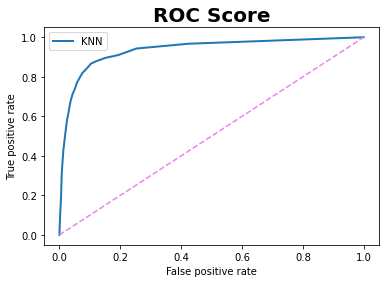

In [800]:

plt.plot(fpr, tpr,lw=2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Score', fontweight="bold", fontsize=20);
plt.legend(['KNN'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))

In [812]:
with open('web_app/knnh.pickle', 'wb') as to_write:
    pickle.dump(knn, to_write)

#### Naive Bayes

In [813]:
bnbh = BernoulliNB()
bnbh.fit(X_train_pre, y_train)
bnbh.score(x_test_pre, y_test)

0.7883883883883884

In [814]:
fprbnb, tprbnb, thresholdsbnb = roc_curve(y_test, bnb.predict_proba(x_test_pre)[:,1])

ValueError: Expected input with 46 features, got 41 instead

ValueError: Expected input with 46 features, got 41 instead

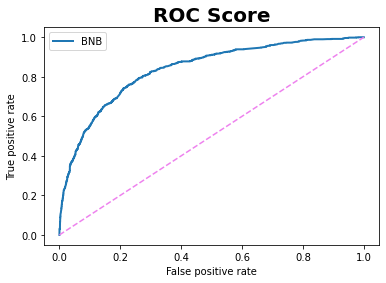

In [815]:

plt.plot(fprbnb, tprbnb,lw=2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Score', fontweight="bold", fontsize=20);
plt.legend(['BNB'])
print("BNB ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test_pre)[:,1]))

In [816]:
with open('web_app/bngbh.pickle', 'wb') as to_write:
    pickle.dump(bnbh, to_write)

In [817]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [818]:
forest = RandomForestClassifier()
forest.fit(X_train_pre, y_train)

RandomForestClassifier()

In [819]:
forest.score(X_train_pre, y_train)

0.8460152182619143

In [820]:
forest.score(x_test_pre, y_test)

0.7821821821821822

In [821]:
with open('web_app/foresth.pickle', 'wb') as to_write:
    pickle.dump(forest, to_write)

In [822]:
from sklearn.svm import SVC

In [823]:
svc = SVC(probability = True)
svc.fit(X_train_pre, y_train)

SVC(probability=True)

In [824]:
svc.score(x_test_pre, y_test)

0.795995995995996

In [825]:
with open('web_app/svch.pickle', 'wb') as to_write:
    pickle.dump(svc, to_write)

In [826]:
logith = LogisticRegression()
logith.fit(X_train_pre,y_train)
logith.score(X_train_pre,y_train)

0.7964891202776665

In [827]:
logith.score(x_test_pre,y_test), logith.coef_

(0.7933933933933934,
 array([[-0.00668492,  0.18563875,  0.07698282,  0.03086803, -0.18426905,
          0.06680304,  0.1519236 ,  0.04635977, -0.08714037,  0.17102689,
          0.08439475,  0.02737368,  0.03659551,  0.09059987,  0.03907532,
         -0.02393347, -0.07636112,  0.03155504, -0.09620349,  0.06458944,
         -0.00322434, -0.10605241,  0.0196128 , -0.0017998 , -0.03299172,
          0.12026747,  0.08418346, -0.00190188,  0.01490764, -0.02972287,
         -0.0012219 ,  0.04268018,  0.03012307,  0.        , -0.05529874,
          0.61392254,  0.04724673,  0.04723347,  0.0139961 , -0.00406359,
          0.03822783]]))

In [828]:
with open('web_app/logith.pickle', 'wb') as to_write:
    pickle.dump(logith, to_write)

In [829]:
xgbh = xgb.XGBClassifier()
xgbh.fit(X_train, y_train)
xgbh.score(x_test, y_test)

0.7935935935935936

In [830]:
with open('web_app/xgbh.pickle', 'wb') as to_write:
    pickle.dump(xgbh, to_write)

In [399]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test_pre)[:,1])
fprlog, tprlog, thresholdslog = roc_curve(y_test, logit.predict_proba(x_test_pre)[:,1])
fprnb, tprnb, thresholdsnb = roc_curve(y_test, bnb.predict_proba(x_test_pre)[:,1])
fprrf, tprrf, thresholdsrf = roc_curve(y_test, forest.predict_proba(x_test_pre)[:,1])

fprsvc, tprsvc, thresholdssvc = roc_curve(y_test, svc.predict_proba(x_test_pre)[:,1])

KNN ROC AUC score =  0.8751513175364334
Logit ROC AUC score =  0.898512374287901
Naive Bayes ROC AUC score =  0.8968837234211097
Random Forest ROC AUC score =  0.9339308586245137
SVC ROC AUC score =  0.9260569076664575


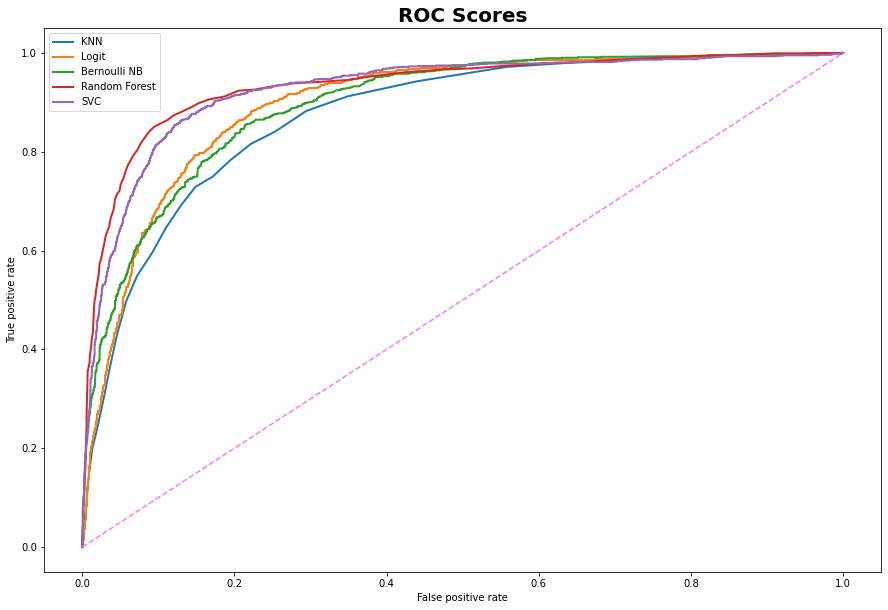

In [400]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr,lw=2)
plt.plot(fprlog, tprlog,lw=2)
plt.plot(fprnb, tprnb,lw=2)
plt.plot(fprrf, tprrf,lw=2)

plt.plot(fprsvc, tprsvc,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Scores', fontweight="bold", fontsize=20);
plt.legend(['KNN','Logit', 'Bernoulli NB', 'Random Forest','SVC'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))
print("Logit ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(x_test_pre)[:,1]))
print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test_pre)[:,1]))
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, forest.predict_proba(x_test_pre)[:,1]))
print("SVC ROC AUC score = ", roc_auc_score(y_test, svc.predict_proba(x_test_pre)[:,1]))

### Hops OverSample

In [57]:
list(df.columns)

['title',
 'bstyle',
 'og',
 'fg',
 'abv',
 'ibu',
 'srm',
 'Mash pH',
 'hops',
 'others',
 'water',
 'notes',
 'IBU (rager)',
 'SRM (daniels)',
 'SRM (ebcmorey)',
 'SRM (mosher)',
 'ABV (alternate)',
 'yeast',
 'co2',
 'chal',
 'citra',
 'warrior',
 'casc',
 'saaz',
 'azacca',
 'colum',
 'mag',
 'perle',
 'simcoe',
 'amar',
 'cashmere',
 'comet',
 'galaxy',
 'apollo',
 'willam',
 'goldings',
 'heller',
 'fug',
 'nugg',
 'hopshot',
 'tett',
 'mosaic',
 'brewerg',
 'northb',
 'cent',
 'chinook',
 'crystal',
 'magnum',
 'ctz',
 'styr',
 'idaho',
 'nelson',
 'exper',
 'hall',
 'noble',
 'dryh',
 'lact',
 'clone',
 'juicy',
 'dank',
 'wedding',
 'whisk',
 'trop',
 'award',
 'best',
 'smoke',
 'roast',
 'thick',
 'pine',
 'sticky',
 'foam',
 'hoppy',
 'choco',
 'coffee',
 'straw',
 'bisc',
 'dark',
 'heavy',
 'stfruit',
 'hazy',
 'pheno',
 'ester',
 'banana',
 'bitter',
 'clove',
 'sour',
 'wylon',
 'kveik',
 'omega',
 'us5',
 'us4',
 'chico',
 'yeast_dark',
 'wy1056',
 'wy1272',
 'wlp080',

In [904]:
ohops = df[['ipa','chal','citra',
 'warrior',
 'casc',
 'saaz',

 'azacca',
 'colum',
 'mag',
 'perle',
 'simcoe',
 'amar',
 'cashmere',
 'comet',
 'galaxy',
 'apollo',
 'willam',
 'goldings',
 'heller',
 'fug',
 'nugg',
 'hopshot',
 'tett',
 'mosaic',
 'brewerg',
 'northb',
 'cent',
 'chinook',
 'crystal',
 'ctz','styr','idaho','nelson','exper','hall','noble','dryh', 'wylon', 'us5', 'us4', 'chico', 'vermont']].dropna()

In [805]:
df.bugu.mean()

0.7208991814231157

In [906]:
Xo = ohops.drop(columns =['ipa'])
yo= ohops['ipa']

In [908]:
Xo_train, xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.2)
Xo_train, xo_val, yo_train, yo_val = train_test_split(Xo_train, yo_train, test_size=0.25)

In [935]:
from imblearn.over_sampling import SMOTE, ADASYN

In [936]:
ros = ADASYN()
Xo_resampled, yo_resampled = ros.fit_sample(Xo_train,yo_train)
#X_pre = preprocessing.scale(X)
Xo_train_pre = preprocessing.scale(Xo_resampled)
#x_test_pre = preprocessing.scale(x_test_resampled)

In [937]:
x_test_pre = preprocessing.scale(x_test)

In [938]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(Xo_train_pre, yo_resampled)

KNeighborsClassifier(n_neighbors=30)

In [939]:
knn.score(Xo_train_pre, yo_resampled)

0.6438800674944837

In [940]:
knn.score(x_test_pre,y_test)

0.7793793793793794

In [799]:
knn.predict(x_test_pre)

array([0, 0, 0, ..., 0, 0, 0])

Need to beat .82, doesn't

KNN ROC AUC score =  0.7848085013881652


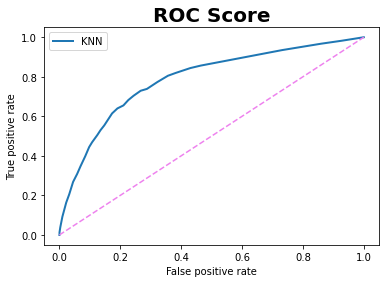

In [941]:

plt.plot(fpr, tpr,lw=2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Score', fontweight="bold", fontsize=20);
plt.legend(['KNN'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))

In [812]:
with open('web_app/knnh.pickle', 'wb') as to_write:
    pickle.dump(knn, to_write)

#### Naive Bayes

In [918]:
bnbh = BernoulliNB()
bnbh.fit(Xo_train_pre, yo_resampled)
bnbh.score(x_test_pre, y_test)

0.7561561561561562

In [814]:
fprbnb, tprbnb, thresholdsbnb = roc_curve(y_test, bnb.predict_proba(x_test_pre)[:,1])

ValueError: Expected input with 46 features, got 41 instead

ValueError: Expected input with 46 features, got 41 instead

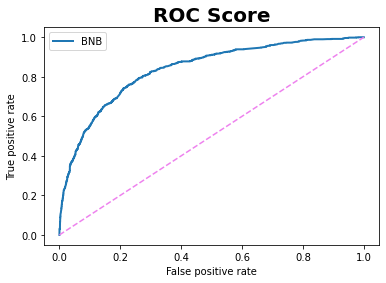

In [815]:

plt.plot(fprbnb, tprbnb,lw=2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Score', fontweight="bold", fontsize=20);
plt.legend(['BNB'])
print("BNB ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test_pre)[:,1]))

In [816]:
with open('web_app/bngbh.pickle', 'wb') as to_write:
    pickle.dump(bnbh, to_write)

In [817]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [919]:
forest = RandomForestClassifier()
forest.fit(Xo_train_pre, yo_resampled)

RandomForestClassifier()

In [920]:
forest.score(X_train_pre, y_train)

0.7818048324656254

In [921]:
forest.score(x_test_pre, y_test)

0.7847847847847848

In [821]:
with open('web_app/foresth.pickle', 'wb') as to_write:
    pickle.dump(forest, to_write)

In [822]:
from sklearn.svm import SVC

In [922]:
svc = SVC(probability = True)
svc.fit(Xo_train_pre, yo_resampled)

SVC(probability=True)

In [923]:
svc.score(x_test_pre, y_test)

0.7485485485485486

In [825]:
with open('web_app/svch.pickle', 'wb') as to_write:
    pickle.dump(svc, to_write)

In [924]:
logith = LogisticRegression()
logith.fit(Xo_train_pre,yo_resampled)
logith.score(x_test_pre,y_test)

0.7363363363363363

In [827]:
logith.score(x_test_pre,y_test), logith.coef_

(0.7933933933933934,
 array([[-0.00668492,  0.18563875,  0.07698282,  0.03086803, -0.18426905,
          0.06680304,  0.1519236 ,  0.04635977, -0.08714037,  0.17102689,
          0.08439475,  0.02737368,  0.03659551,  0.09059987,  0.03907532,
         -0.02393347, -0.07636112,  0.03155504, -0.09620349,  0.06458944,
         -0.00322434, -0.10605241,  0.0196128 , -0.0017998 , -0.03299172,
          0.12026747,  0.08418346, -0.00190188,  0.01490764, -0.02972287,
         -0.0012219 ,  0.04268018,  0.03012307,  0.        , -0.05529874,
          0.61392254,  0.04724673,  0.04723347,  0.0139961 , -0.00406359,
          0.03822783]]))

In [828]:
with open('web_app/logith.pickle', 'wb') as to_write:
    pickle.dump(logith, to_write)

In [925]:
xgbh = xgb.XGBClassifier()
xgbh.fit(Xo_train_pre, yo_resampled)
xgbh.score(x_test_pre, y_test)

0.7685685685685686

In [830]:
with open('web_app/xgbh.pickle', 'wb') as to_write:
    pickle.dump(xgbh, to_write)

In [926]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test_pre)[:,1])
fprlog, tprlog, thresholdslog = roc_curve(y_test, logith.predict_proba(x_test_pre)[:,1])
fprnb, tprnb, thresholdsnb = roc_curve(y_test, bnb.predict_proba(x_test_pre)[:,1])
fprrf, tprrf, thresholdsrf = roc_curve(y_test, forest.predict_proba(x_test_pre)[:,1])

fprsvc, tprsvc, thresholdssvc = roc_curve(y_test, svc.predict_proba(x_test_pre)[:,1])

NameError: name 'logit' is not defined

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr,lw=2)
plt.plot(fprlog, tprlog,lw=2)
plt.plot(fprnb, tprnb,lw=2)
plt.plot(fprrf, tprrf,lw=2)

plt.plot(fprsvc, tprsvc,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Scores', fontweight="bold", fontsize=20);
plt.legend(['KNN','Logit', 'Bernoulli NB', 'Random Forest','SVC'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test_pre)[:,1]))
print("Logit ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(x_test_pre)[:,1]))
print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test_pre)[:,1]))
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, forest.predict_proba(x_test_pre)[:,1]))
print("SVC ROC AUC score = ", roc_auc_score(y_test, svc.predict_proba(x_test_pre)[:,1]))

In [151]:
import word_search

In [834]:
list(df.columns)

['title',
 'bstyle',
 'og',
 'fg',
 'abv',
 'ibu',
 'srm',
 'Mash pH',
 'hops',
 'others',
 'water',
 'notes',
 'IBU (rager)',
 'SRM (daniels)',
 'SRM (ebcmorey)',
 'SRM (mosher)',
 'ABV (alternate)',
 'yeast',
 'co2',
 'chal',
 'citra',
 'warrior',
 'casc',
 'saaz',
 'azacca',
 'colum',
 'mag',
 'perle',
 'simcoe',
 'amar',
 'cashmere',
 'comet',
 'galaxy',
 'apollo',
 'willam',
 'goldings',
 'heller',
 'fug',
 'nugg',
 'hopshot',
 'tett',
 'mosaic',
 'brewerg',
 'northb',
 'cent',
 'chinook',
 'crystal',
 'magnum',
 'ctz',
 'styr',
 'idaho',
 'nelson',
 'exper',
 'hall',
 'noble',
 'dryh',
 'lact',
 'hopcmp',
 'clone',
 'juicy',
 'dank',
 'wedding',
 'whisk',
 'trop',
 'award',
 'best',
 'smoke',
 'roast',
 'thick',
 'pine',
 'sticky',
 'foam',
 'hoppy',
 'choco',
 'coffee',
 'straw',
 'bisc',
 'dark',
 'heavy',
 'stfruit',
 'hazy',
 'pheno',
 'ester',
 'banana',
 'bitter',
 'clove',
 'sour',
 'wylon',
 'kveik',
 'omega',
 'us5',
 'us4',
 'chico',
 'yeast_dark',
 'wy1056',
 'wy1272',

In [836]:
no_null_notes = df.dropna(subset = ['notes'])

In [886]:
word_df = no_null_notes[['threesty', 'dryh', 'lact', 'clone', 'juicy', 'dank', 'wedding', 'whisk', 'trop',\
              'award', 'best', 'smoke', 'roast', 'thick',\
              'heavy', 'stfruit', 'hazy', 'pheno', 'banana','clove', \
              'bitter','puree','lovehop', \
              'strong', 'dry', 'sweet', 'sour', 'dark', 'pine', \
            'sticky', 'foam', 'hoppy','bisc','ester', 'straw', 'choco','coffee','malt',\
 'agg',
 'balance',
 'complex',
 'crisp',
 'smooth',
 'diac',
 'apple',
 'floral',
 'fruity',
 'robust',
 'wood',
 'vanilla',
 'cherry',
 'funk',
 'grapef',
 'solvent' ]].dropna()

In [843]:
len(df), len(word_df)

(24972, 16767)

In [887]:
X3b = word_df.drop(columns =['threesty'])
y3b = word_df['threesty']

In [854]:
X3b.columns

Index(['dryh', 'lact', 'clone', 'juicy', 'dank', 'wedding', 'whisk', 'trop',
       'award', 'best', 'smoke', 'roast', 'thick', 'heavy', 'stfruit', 'hazy',
       'pheno', 'banana', 'clove', 'bitter', 'puree', 'lovehop', 'strong',
       'dry', 'sweet', 'sour', 'dark', 'sticky', 'pine', 'sticky', 'foam',
       'hoppy', 'bisc', 'ester', 'straw', 'choco', 'coffee', 'malt', 'agg',
       'balance', 'complex', 'crisp', 'smooth', 'diac', 'apple', 'floral',
       'fruity', 'robust', 'wood', 'vanilla', 'cherry', 'funk', 'grapef',
       'solvent'],
      dtype='object')

In [888]:
X3b_train, x3b_test, y3b_train, y3b_test = train_test_split(X3b, y3b, test_size=0.2)
X3b_train, x3b_val, y3b_train, y3b_val = train_test_split(X3b_train, y3b_train, test_size=0.25)

In [889]:
X3b_pre = preprocessing.scale(X3b)
X3b_train_pre = preprocessing.scale(X3b_train)
x3b_test_pre = preprocessing.scale(x3b_test)

In [52]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X3b_train_pre,y3b_train)

In [890]:
forest3b = RandomForestClassifier() #, 4:2, 5:2, 8:2, 15:2 , 16: 2, 20:2, 22:2, 23:2
forest3b.fit(X3b_train_pre, y3b_train)

RandomForestClassifier()

In [891]:
forest3b.score(X3b_train_pre, y3b_train)

0.7248235411074659

In [892]:
forest3b.score(x3b_test_pre, y3b_test)

0.6332737030411449

In [67]:
forest3b.predict(bro_df)

array(['Strong/Dark Ales'], dtype=object)

In [893]:
with open('web_app/f3.pickle', 'wb') as to_write:
    pickle.dump(forest3b, to_write)

In [119]:
k_options = list(range(1, 51))
k_scores = []
for k in k_options:
    knn_bro = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_bro, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.3362931224679302, 0.29885397700135047, 0.3917841227855375, 0.402244950407192, 0.4115505116872223, 0.4534497671283691, 0.4570836434651687, 0.4522929854846178, 0.45895682964852264, 0.4595608896884296, 0.4588451518817627, 0.4580204638521647, 0.46325031700120506, 0.4638004928974759, 0.4680390657010758, 0.4641858039223292, 0.4650108859304803, 0.4676538455943501, 0.46908459386266266, 0.4686448531854076, 0.46787420082965825, 0.46655243309031924, 0.46693792595142797, 0.4680935256595201, 0.46814837959651756, 0.4683135172223178, 0.4689193956247773, 0.4679834238069723, 0.47029568393464566, 0.4705710749432065, 0.47194730264098983, 0.4716169061652188, 0.47304832116646744, 0.47266279799931626, 0.47167185102034387, 0.4726628586114015, 0.4720024596384126, 0.4725527870648961, 0.4726630404476567, 0.47282799623720184, 0.47238752821492574, 0.47178161950642367, 0.47178171042455136, 0.47249741792517563, 0.4717265837331711, 0.47156129457715795, 0.4721121978184499, 0.47348860735248843, 0.4738738880712992, 

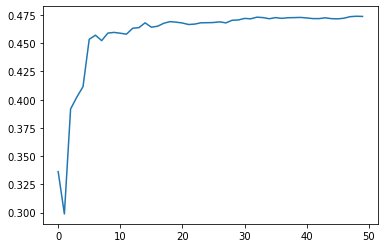

In [120]:
dict_k = (dict(zip(range(50), k_scores)))
plt.plot(k_scores)

In [885]:
y3b.value_counts()

Pale Ales and Lagers                   8395
Strong/Dark Ales                       6639
Other (Sours, Wild, Holiday styles)    1733
Name: threesty, dtype: int64

In [128]:
max_kv = max(dict_k.values())
for key, value in dict_k.items():
    if value == max_kv:
        best_k = key

In [894]:
knn3b = KNeighborsClassifier(n_neighbors = 43)
knn3b.fit(X3b_train_pre, y3b_train)

KNeighborsClassifier(n_neighbors=43)

In [895]:
knn3b.score(X3b_train, y3b_train)

0.635450840043742

In [896]:
knn3b.score(x3b_test,y3b_test)

0.6356589147286822

In [897]:
with open('web_app/knn3b.pickle', 'wb') as to_write:
    pickle.dump(knn3b, to_write)

In [898]:
svc3b = SVC()
svc3b.fit(X3b_train_pre, y3b_train)
svc3b.score(X3b_train_pre, y3b_train), svc3b.score(x3b_test_pre, y3b_test)

(0.6808827915299731, 0.6392367322599881)

In [899]:
with open('web_app/svc3b.pickle', 'wb') as to_write:
    pickle.dump(svc3b, to_write)

In [367]:
import xgboost as xgb

In [900]:
xgbm = xgb.XGBClassifier(learning_rate = .02, n_estimators = 100 ,max_depth = 4, min_child_weight = 1, objective='multi:softmax')
xgbm.fit(X3b_train_pre, y3b_train)
xgbm.score(x3b_test_pre, y3b_test)

0.6443053070960048

In [901]:
with open('web_app/xgb3b.pickle', 'wb') as to_write:
    pickle.dump(xgbm, to_write)

In [902]:
mnb3b = MultinomialNB()
mnb3b.fit(abs(X3b_train_pre), y3b_train)
mnb3b.score(abs(X3b_train_pre), y3b_train), mnb3b.score(abs(x3b_test_pre), y3b_test)

(0.6108957152798489, 0.6150864639236733)

In [903]:
with open('web_app/mnb3b.pickle', 'wb') as to_write:
    pickle.dump(mnb3b, to_write)

In [370]:
abv = 6
srm = 6
ibu = 75
bugu = .72
hopcmp = 90
nums = [abv, srm, ibu]

In [371]:
review = "wow, mango and papaya tropical tastes. Juicy and hazy. A real hoppy beer for hop lovers!"

In [372]:
bro = word_search.search_desc(review)
    #'This beer is incredibly dank and bitter. Bone dry and delicious. Only for true hop lovers. Hazy stone fruit bomb. Tropical.')

In [373]:
w_nums = np.append(bro, nums)


In [374]:
bro_df = pd.DataFrame(w_nums).T

In [349]:
bro_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,6.0,75.0,0.72,90.0


In [350]:
svc3b.predict(bro_df)

array(['Strong/Dark Ales'], dtype=object)

In [375]:
(forest3b.predict(bro_df)[0], knn3b.predict(bro_df)[0], svc3b.predict(bro_df)[0], mnb3b.predict(bro_df)[0]) #xgbm.predict(bro_df)[0])

('Strong/Dark Ales',
 'Pale Ales and Lagers',
 'Pale Ales and Lagers',
 'Pale Ales and Lagers')

In [376]:
forpredtabsvc = pd.DataFrame(svc3b.predict(x3b_test_pre))

In [377]:
forpredtabsvc.value_counts()

Pale Ales and Lagers                   1792
Strong/Dark Ales                       1179
Other (Sours, Wild, Holiday styles)      45
dtype: int64

In [378]:
forpredtabmnb = pd.DataFrame(mnb3b.predict(x3b_test_pre))

In [379]:
forpredtabmnb.value_counts()

Pale Ales and Lagers                   1939
Strong/Dark Ales                        910
Other (Sours, Wild, Holiday styles)     167
dtype: int64

In [380]:
forpredtabfor = pd.DataFrame(forest3b.predict(x3b_test_pre))

In [381]:
forpredtabfor.value_counts()

Pale Ales and Lagers                   1645
Strong/Dark Ales                       1267
Other (Sours, Wild, Holiday styles)     104
dtype: int64

In [382]:
forpredtabknn = pd.DataFrame(knn3b.predict(x3b_test_pre))

In [383]:
forpredtabknn.value_counts()

Pale Ales and Lagers                   1855
Strong/Dark Ales                       1127
Other (Sours, Wild, Holiday styles)      34
dtype: int64

In [384]:
forpredtrues = pd.DataFrame(y3b_test)

In [227]:
"TRUES", forpredtrues.value_counts()

('TRUES',
 threesty                           
 Pale Ales and Lagers                   1609
 Strong/Dark Ales                       1151
 Other (Sours, Wild, Holiday styles)     335
 dtype: int64)

In [550]:
df.threesty.value_counts()

Pale Ales and Lagers                   13697
Strong/Dark Ales                       10577
Other (Sours, Wild, Holiday styles)     2722
Name: threesty, dtype: int64

In [214]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [215]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, f1_score, accuracy_score

In [216]:
from sklearn.metrics import confusion_matrix

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

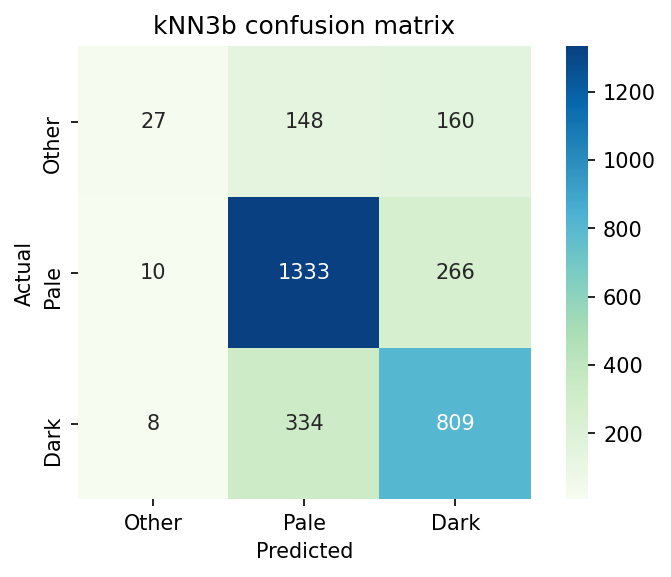

In [217]:
# Print confusion matrix for kNN
knn3b_confusion = confusion_matrix(y3b_test, knn3b.predict(x3b_test_pre))
plt.figure(dpi=150)
sns.heatmap(knn3b_confusion, cmap=plt.cm.GnBu, annot=True, square=True,
           xticklabels=['Other', 'Pale', 'Dark'],
           yticklabels=['Other', 'Pale', 'Dark'], fmt = 'g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN3b confusion matrix')
print("Precision Score: ", precision_score(y3b_test,knn3b.predict(x3b_test_pre)))
print("Recall Score: ", recall_score(y3b_test,knn3b.predict(x3b_test_pre)))
print("Accuracy : ", accuracy_score(y3b_test, knn3b.predict(x3b_test_pre)));

# Predicting Quants

In [386]:
corr_df = df[['ipa', 'threesty', 'foursty', 'og', 'fg', 'abv', 'srm', 'ibu', 'bugu', 'hopcmp']]

In [9]:
corr_df.corr()

,ipa,og,fg,abv,srm,ibu,bugu,hopcmp
ipa,1.000000,0.037788,0.030705,0.155020,-0.170530,0.514471,0.437217,0.406334
og,0.037788,1.000000,0.980055,0.180430,0.060313,0.052124,-0.012195,0.024153
fg,0.030705,0.980055,1.000000,0.159587,0.106518,0.057145,-0.015861,0.015112
abv,0.155020,0.180430,0.159587,1.000000,0.281197,0.265004,-0.017909,0.112851
srm,-0.170530,0.060313,0.106518,0.281197,1.000000,0.044608,-0.041714,-0.122126
ibu,0.514471,0.052124,0.057145,0.265004,0.044608,1.000000,0.859581,0.339367
bugu,0.437217,-0.012195,-0.015861,-0.017909,-0.041714,0.859581,1.000000,0.287475
hopcmp,0.406334,0.024153,0.015112,0.112851,-0.122126,0.339367,0.287475,1.000000


In [387]:
corr_df = corr_df.dropna()

In [347]:
X = corr_df.drop(columns =['ipa', 'threesty', 'foursty'])
y= corr_df['ipa']

In [71]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [15]:
from sklearn import preprocessing

In [72]:
X_pre = preprocessing.scale(X)
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [164]:
forestC = RandomForestClassifier(n_estimators = 800, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth =  100, bootstrap = True)
forestC.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=800)

In [165]:
forestC.score(X_train, y_train)

1.0

In [166]:
forestC.score(x_test, y_test)

0.9088300220750551

### Let's Random Search CV

In [155]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [156]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forestC, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_pre, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [157]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [20]:
from get_stats import get_stats

In [ ]:
0	1.047	1.014	4.27	10.07	20.80	0.442553	18.9

In [239]:
test_df = get_stats()

Enter Original Gravity:  1.047
Enter Final Gravity:  1.014
Enter ABV:  4.27
Enter SRM:  10.07
Enter IBU:  20.80
On a scale of 1-100, how hoppy is this beer? :  18.9


In [106]:
from collections import defaultdict

In [240]:
preds = [knnq.predict(test_df)[0], svcq.predict(test_df)[0], bnbq.predict(test_df)[0], logq.predict(test_df)[0]] #forestC.predict(test_df)[0]]
clean_pred = defaultdict(int)
for pred in preds:
    if pred == 1:
        clean_pred['IPA'] +=1
    if pred == 0:
        clean_pred['NOT IPA'] += 1
res_dic = dict(clean_pred)

In [244]:
res_dic, preds

({'IPA': 3, 'NOT IPA': 1}, [1, 0, 1, 1])

In [243]:
for key, value in res_dic.items():
    if value == len(preds)/2:
        print("TIE")
        break
    elif value > len(preds)/2:
        print(key)
    else:
        continue

IPA


In [242]:
svcpred = svcq.predict(test_df)[0]
if svcpred == 0:
    print('NOT IPA')
elif svcpred == 1:
    print('IPA')

NOT IPA


In [221]:
corr_df.sample(20)

,ipa,og,fg,abv,srm,ibu,bugu,hopcmp
21222,0,1.054,1.013,5.29,16.03,22.07,0.408704,18.9
14616,1,1.059,1.011,6.19,6.73,43.00,0.728814,59.5
15947,0,1.040,1.009,4.04,48.83,20.17,0.504250,8.7
3969,0,1.050,1.013,4.82,3.30,8.18,0.163600,14.5
9581,0,1.055,1.013,5.52,4.04,35.92,0.653091,35.5
4358,0,1.052,1.013,5.07,13.53,19.06,0.366538,9.1
16530,0,1.052,1.010,5.50,9.21,36.87,0.709038,41.1
13722,0,1.053,1.008,5.96,4.81,27.66,0.521887,27.7
1785,1,1.086,1.020,8.62,8.89,100.24,1.165581,59.5
16319,0,1.047,1.014,4.27,10.07,20.80,0.442553,18.9


In [126]:
y_test.tail(20)

11048    1
87       0
18997    1
24449    0
23524    0
4048     0
6042     0
14338    0
18037    0
18400    0
17156    0
19321    0
13341    0
22511    0
22443    0
15302    0
14297    0
3845     1
6182     1
22727    0
Name: ipa, dtype: int64

In [36]:
forestC.predict(x_test_pre)

array([1, 1, 1, ..., 1, 0, 0])

In [30]:
corr_df.hopcmp.sample(20)

13050     17.6
22207     10.0
21249     45.8
18906     63.4
8360      17.5
20784     35.5
20443    109.7
317       54.0
10284     26.1
5689       8.8
15771      9.0
22543     37.4
9364       9.0
2320      17.4
17325     17.8
10899      9.1
16174      8.8
4781      25.4
1843      57.2
115       18.1
Name: hopcmp, dtype: float64

In [58]:
corr_df.hopcmp.max()

395.5

In [62]:
norms = []
for index, row in corr_df.iterrows():
    norm = (row.hopcmp - 1)/ 200
    norms.append(norm)
corr_df['normcmp'] = norms

In [63]:
corr_df.normcmp

0        0.4635
1        0.1240
2        0.1945
3        0.2440
4        0.4355
          ...  
24967    0.1800
24968    0.1915
24969    0.1915
24970    0.0935
24971    0.0935
Name: normcmp, Length: 22648, dtype: float64

In [91]:
knnq = KNeighborsClassifier(n_neighbors = 20)
knnq.fit(X_train_pre, y_train)

KNeighborsClassifier(n_neighbors=20)

In [92]:
knnq.score(X_train_pre, y_train)

0.9025610833088019

In [93]:
knnq.score(x_test_pre,y_test)

0.9013245033112582

In [146]:
svcq = SVC(probability = True)
svcq.fit(X_train_pre, y_train)
svcq.score(X_train_pre, y_train), svcq.score(x_test_pre, y_test)

(0.9009420076538122, 0.9028697571743929)

In [144]:
logq = LogisticRegression()
logq.fit(X_train_pre, y_train)
logq.score(x_test_pre, y_test)

0.8713024282560706

In [80]:
import xgboost as xgb

In [86]:
xgbq = xgb.XGBClassifier(learning_rate = .3, n_estimators = 100 ,max_depth = 4, min_child_weight = 1)
xgbq.fit(X_train_pre, y_train)
xgbq.score(x_test_pre, y_test)

0.8969094922737307

In [152]:
bnbq = MultinomialNB()
bnbq.fit(abs(X_train_pre), y_train)
bnbq.score(abs(X_train_pre), y_train), bnbq.score(abs(x_test_pre), y_test)

(0.7962908448631145, 0.7902869757174393)

In [140]:
df[df.ipa == 0].bugu.mean()

0.5761910312655648

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, knnq.predict_proba(x_test_pre)[:,1])
fprlog, tprlog, thresholdslog = roc_curve(y_test, logq.predict_proba(x_test_pre)[:,1])
fprnb, tprnb, thresholdsnb = roc_curve(y_test, bnbq.predict_proba(x_test_pre)[:,1])
fprrf, tprrf, thresholdsrf = roc_curve(y_test, forestC.predict_proba(x_test_pre)[:,1])

fprsvc, tprsvc, thresholdssvc = roc_curve(y_test, svcq.predict_proba(x_test_pre)[:,1])

KNN ROC AUC score =  0.9347476142947563
Logit ROC AUC score =  0.9196965639647853
Naive Bayes ROC AUC score =  0.766370740365336
Random Forest ROC AUC score =  0.48635647150210903
SVC ROC AUC score =  0.9198296256788637


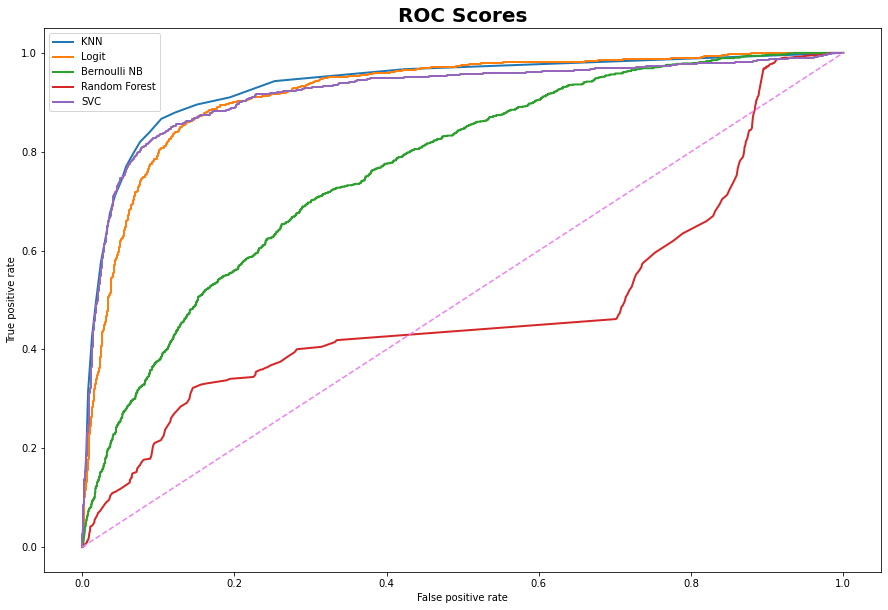

In [169]:
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr,lw=2)
plt.plot(fprlog, tprlog,lw=2)
plt.plot(fprnb, tprnb,lw=2)
plt.plot(fprrf, tprrf,lw=2)

plt.plot(fprsvc, tprsvc,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Scores', fontweight="bold", fontsize=20);
plt.legend(['KNN','Logit', 'Bernoulli NB', 'Random Forest','SVC'])
print("KNN ROC AUC score = ", roc_auc_score(y_test, knnq.predict_proba(x_test_pre)[:,1]))
print("Logit ROC AUC score = ", roc_auc_score(y_test, logq.predict_proba(x_test_pre)[:,1]))
print("Naive Bayes ROC AUC score = ", roc_auc_score(y_test, bnbq.predict_proba(x_test_pre)[:,1]))
print("Random Forest ROC AUC score = ", roc_auc_score(y_test, forestC.predict_proba(x_test_pre)[:,1]))
print("SVC ROC AUC score = ", roc_auc_score(y_test, svcq.predict_proba(x_test_pre)[:,1]))

In [248]:
corr_df.columns

Index(['ipa', 'threesty', 'og', 'fg', 'abv', 'srm', 'ibu', 'bugu', 'hopcmp'], dtype='object')

In [352]:
corr_df = corr_df.dropna()

In [388]:
X_ = corr_df.drop(columns = ['ipa', 'threesty', 'foursty'])
y_ = corr_df['foursty']

In [389]:
X_train, x_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [15]:
from sklearn import preprocessing

In [390]:
X_pre = preprocessing.scale(X)
X_train_pre = preprocessing.scale(X_train)
x_test_pre = preprocessing.scale(x_test)

In [391]:
forest3 = RandomForestClassifier(n_estimators = 461, min_samples_split= 2, min_samples_leaf=2, max_features='sqrt',\
                                  max_depth = 20, bootstrap = True)
forest3.fit(X_train_pre, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=461)

In [392]:
forest3.score(X_train_pre, y_train)

0.9374448042390344

In [393]:
forest3.score(x_test_pre, y_test)

0.6781456953642384

In [267]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [268]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest3, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_pre, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=100,
                                                    n_estimators=800),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 137, 245, 353, 461,
                                                         568, 676, 784, 892,
                                                         1000]},
                   random_state=42, verbose=2)

In [274]:
rf_random.best_params_

{'n_estimators': 461,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [394]:
forest3op = RandomForestClassifier(n_estimators = 461, min_samples_split= 2, min_samples_leaf=2, max_features='sqrt',\
                                  max_depth = 20, bootstrap = True)
forest3op.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=461)

In [395]:
forest3op.score(x_test, y_test)

0.7185430463576159

In [396]:
knn3 = KNeighborsClassifier(n_neighbors = 90)
knn3.fit(X_train_pre, y_train)
knn3.score(x_test_pre, y_test)

0.6821192052980133

In [397]:
mnb3 = MultinomialNB()
mnb3.fit(X_train, y_train)
mnb3.score(x_test, y_test)

0.5591611479028697

In [398]:
logr3 = LogisticRegression()
logr3.fit(X_train_pre, y_train)
logr3.score(x_test_pre, y_test)

0.6214128035320088

In [561]:
xgb3 = xgb.XGBClassifier()
xgb3.fit(X_train, y_train)
xgb3.score(x_test, y_test)

0.7092715231788079

In [521]:
xgb3.predict(test_df)

array(['Strong/Dark Ales'], dtype=object)

In [368]:
svcpred = svcq.predict(test_df)[0]
if svcpred == 0:
    print('NOT IPA')
elif svcpred == 1:
    print('IPA')

NOT IPA


In [517]:
%load_ext autoreload
%autoreload 2

In [564]:
corr_df.sample(10)

,ipa,threesty,foursty,og,fg,abv,srm,ibu,bugu,hopcmp
5045,1,Pale Ales and Lagers,IPA/Pale Ales,1.074,1.021,6.99,7.45,51.09,0.690405,27.2
20304,1,Pale Ales and Lagers,IPA/Pale Ales,1.054,1.010,5.77,4.77,88.12,1.631852,90.0
11380,0,Pale Ales and Lagers,Lager/Cream Ale,1.056,1.017,5.17,9.52,19.85,0.354464,19.9
952,0,Pale Ales and Lagers,Lager/Cream Ale,1.055,1.010,5.83,6.84,21.65,0.393636,14.4
21882,0,Strong/Dark Ales,Strong/Dark Ales,1.056,1.010,6.09,15.08,21.63,0.386250,19.0
7887,0,Pale Ales and Lagers,IPA/Pale Ales,1.063,1.014,6.48,11.83,33.77,0.536032,26.8
8921,0,Strong/Dark Ales,Strong/Dark Ales,1.065,1.019,6.01,18.38,24.03,0.369692,29.8
14239,1,Pale Ales and Lagers,IPA/Pale Ales,1.039,1.011,3.70,8.42,32.84,0.842051,18.3
22653,0,"Other (Sours, Wild, Holiday styles)","Other (Sours, Wild, Holiday styles)",1.056,1.014,5.47,4.10,19.20,0.342857,7.6
18315,0,Strong/Dark Ales,Strong/Dark Ales,1.089,1.025,8.51,40.00,40.04,0.449888,28.2


In [520]:
test_df

,og,fg,abv,srm,ibu,bugu,hopcmp
0,1.02,1.0,5.0,3.0,2.0,0.1,2.0


In [519]:
test_df = get_stats()

Enter Original Gravity:  1.02
Enter Final Gravity:  1
Enter ABV:  5
Enter SRM:  3
Enter IBU:  2
On a scale of 1-100, how hoppy is this beer? :  2


In [556]:
preds = [knn3.predict(test_df)[0], mnb3.predict(test_df)[0], logr3.predict(test_df)[0], forest3op.predict(test_df)[0], forest3.predict(test_df)[0], xgb3.predict(test_df)[0], xgb3.predict(test_df)[0]]
clean_pred = defaultdict(int)
for pred in preds:
    if pred == 'IPA/Pale Ales':
        clean_pred['IPA/Pale Ales'] +=1
    elif pred == 'Strong/Dark Ales':
        clean_pred['Strong/Dark Ales'] += 1
    elif pred == 'Lager/Cream Ale':
        clean_pred['Lager/Cream Ale'] += 1
    else:
        clean_pred['Other'] += 1
res_dic = dict(clean_pred)

In [557]:
res_dic, preds

({'Strong/Dark Ales': 7},
 ['Strong/Dark Ales',
  'Strong/Dark Ales',
  'Strong/Dark Ales',
  'Strong/Dark Ales',
  'Strong/Dark Ales',
  'Strong/Dark Ales',
  'Strong/Dark Ales'])

In [505]:
for key, value in res_dic.items():
    if value == len(preds)/2:
        print("TIE")
        break
    elif value > len(preds)//2:
        print(key)
    else:
        continue

Strong/Dark Ales


In [311]:
forest3op.predict(test_df), knn3.predict(test_df), 

(array(['Pale Ales and Lagers'], dtype=object),
 array(['Pale Ales and Lagers'], dtype=object))

In [492]:
import pickle

In [506]:
with open('knn3.pickle', 'wb') as to_write:
    pickle.dump(knn3, to_write)

In [507]:
with open('mnb3.pickle', 'wb') as to_write:
    pickle.dump(mnb3, to_write)

In [508]:
with open('logr3.pickle', 'wb') as to_write:
    pickle.dump(logr3, to_write)

In [510]:
with open('forest3.pickle', 'wb') as to_write:
    pickle.dump(forest3, to_write)

In [511]:
with open('forest3op.pickle', 'wb') as to_write:
    pickle.dump(forest3op, to_write)

In [562]:
with open('web_app/xgb3.pickle', 'wb') as to_write:
    pickle.dump(xgb3, to_write)

In [525]:
learning_rate = [round(x,2) for x in np.linspace(start = .01, stop = .6, num = 60)]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_depth = range(3,10,1)
child_weight = range(1,6,2)
gamma = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5,2]
subsample = [.6, .7, .8, .9, 1]
col_sample = [.6, .7, .8, .9, 1]
# Tuning the learning_rate:
xgb_tune = xgb.XGBClassifier(n_estimators = 100, max_depth = 3, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'learning_rate':learning_rate},cv=10, verbose = 0, n_jobs = -1)
xgb_grid.fit(X_train,y_train)
best_learning_rate = xgb_grid.best_params_['learning_rate']
print("Best learning_rate:", best_learning_rate)

Best learning_rate: 0.49


In [527]:
# Tuning the learning_rate:
xgb_tune = xgb.XGBClassifier(learning_rate = best_learning_rate, n_estimators = 100,max_depth = 3, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'n_estimators':n_estimators},cv=10, verbose = 0, n_jobs = -1)
xgb_grid.fit(X_train,y_train)
best_n_estimators = xgb_grid.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)

Best n_estimators: 100


In [529]:
xgb_tune = xgb.XGBClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators ,max_depth = 3, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'max_depth': max_depth},cv=10, verbose = 0, n_jobs = -1)
xgb_grid.fit(X_train,y_train)
best_max_depth = xgb_grid.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

Best max_depth: 5


In [532]:
xgb_tune = xgb.XGBClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators ,max_depth = best_max_depth, min_child_weight = 1, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'min_child_weight': child_weight},cv=10, verbose = 0, n_jobs = -1)
xgb_grid.fit(X_train,y_train)
best_min_child_weight = xgb_grid.best_params_['min_child_weight']
print("Best min_child_weight:", best_min_child_weight)

Best min_child_weight: 1


In [533]:
xgb_tune = xgb.XGBClassifier(learning_rate = best_learning_rate, n_estimators = best_n_estimators ,max_depth = best_max_depth, min_child_weight = best_min_child_weight, subsample = .8, colsample_bytree = 1,gamma = 1, n_jobs = -1)
xgb_grid = GridSearchCV(estimator=xgb_tune, param_grid = {'best_subsample': subsample},cv=10, verbose = 0, n_jobs = -1)
xgb_grid.fit(X_train,y_train)
best_subsample = xgb_grid.best_params_['best_subsample']
print("Best min_child_weight:", best_min_child_weight)

[12:13:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { best_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best min_child_weight: 1


In [548]:
xgb3x = xgb.XGBClassifier(learning_rate = 0.19, n_estimators = 90, max_depth = 5, subsample = 1)
xgb3x.fit(X_train, y_train)
xgb3x.score(x_test, y_test)

0.7075055187637969

In [568]:
no_null_notes = df.dropna(subset=['notes'])

In [569]:
no_null_notes.describe()

,og,fg,abv,ibu,srm,Mash pH,IBU (rager),SRM (daniels),SRM (ebcmorey),SRM (mosher),...,lager,stout,kolsch,wit,puree,lovehop,strong,dry,sweet,bugu
count,16767.000000,16767.000000,16330.000000,16767.000000,15408.000000,1735.000000,0.0,540.000000,635.000000,184.000000,...,16767.000000,16767.000000,16767.000000,16767.000000,16767.000000,16767.000000,16767.000000,16767.000000,16767.000000,16767.000000
mean,1.062235,1.014446,6.255043,44.781897,13.710023,3.710144,NaN,17.472778,27.077543,13.897554,...,0.030238,0.088805,0.012704,0.017892,0.015924,0.000775,0.451721,0.008350,0.705314,0.723803
std,0.017652,0.005718,1.830069,37.367555,12.157208,2.593348,NaN,10.649507,23.928009,11.835156,...,0.171247,0.284471,0.111995,0.132564,0.125186,0.027835,0.497678,0.090997,0.455915,0.601657
min,1.000000,0.991000,0.000000,0.000000,0.000000,0.000000,NaN,8.800000,0.000000,5.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.051000,1.011000,5.120000,23.370000,5.190000,0.000000,NaN,9.740000,10.640000,6.130000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.402372
50%,1.059000,1.014000,5.860000,35.210000,8.610000,5.400000,NaN,11.230000,17.170000,6.965000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.609167
75%,1.069000,1.017000,6.980000,56.440000,17.460000,5.640000,NaN,23.795000,33.115000,15.067500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.902577
max,1.260000,1.208000,22.330000,702.290000,87.370000,7.520000,NaN,40.000000,98.500000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.230666


In [672]:
brq_df = no_null_notes[['foursty', 'dryh', 'lact', 'clone', 'juicy', 'dank', 'wedding', 'whisk', 'trop',\
              'award', 'best', 'smoke', 'roast', 'thick',\
              'heavy', 'stfruit', 'hazy', 'pheno', 'banana','clove', \
              'bitter','puree','lovehop', \
              'strong', 'dry', 'sweet', 'sour', 'dark', 'pine', 'sticky',\
                        'foam', 'hoppy','bisc','ester', 'straw', 'choco', 'coffee', \
                       'og', 'fg', 'abv', 'srm', 'ibu', 'bugu', 'hopcmp']].dropna()

In [673]:
Xbq = brq_df.drop(columns=['foursty'])
ybq = brq_df['foursty']

In [674]:
Xb_train, xb_test, yb_train, yb_test = train_test_split(Xbq, ybq, test_size=0.2)
Xb_train, xb_val, yb_train, yb_val = train_test_split(Xb_train, yb_train, test_size=0.25)

In [15]:
from sklearn import preprocessing

In [675]:
Xb_pre = preprocessing.scale(Xbq)
Xb_train_pre = preprocessing.scale(Xb_train)
xb_test_pre = preprocessing.scale(xb_test)

In [676]:
forestbq = RandomForestClassifier(n_estimators = 150, min_samples_split= 2, min_samples_leaf=2, max_features='sqrt',\
                                  max_depth = 20, bootstrap = True)
forestbq.fit(Xb_train, yb_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=150)

In [677]:
forestbq.score(Xb_train, yb_train)

0.8436118479221928

In [678]:
forestbq.score(xb_test, yb_test)

0.7022546419098143

In [679]:
knnbq = KNeighborsClassifier(n_neighbors = 45)
knnbq.fit(Xb_train, yb_train)
knnbq.score(xb_test, yb_test)

0.6647877984084881

In [680]:
mnbbq = MultinomialNB()
mnbbq.fit(Xb_train, yb_train)
mnbbq.score(xb_test, yb_test)

0.5729442970822282

In [681]:
logrbq = LogisticRegression()
logrbq.fit(Xb_train_pre, yb_train)
logrbq.score(xb_test_pre, yb_test)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6545092838196287

In [682]:
xgbbq = xgb.XGBClassifier(n_estimators = 100)
xgbbq.fit(Xb_train, yb_train)
xgbbq.score(xb_test, yb_test)

0.7025862068965517

In [733]:
stats = get_stats()

KeyboardInterrupt: Interrupted by user

In [655]:
from word_search import search_desc

In [727]:
review = input("Enter beer review: ")

Enter beer review:   Enter beer review:  Hazy dank juicy stone fruit pine resin stone fruit mango citrus goodness for hoppy hop lovers. Lactose and hoppy bitter beer with award winning bitterness


In [728]:
desc = search_desc(review)

In [714]:
desc

,dryh,lact,clone,juicy,dank,wedding,whisk,trop,award,best,...,dark,pine,sticky,foam,hoppy,bisc,ester,straw,choco,coffee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [729]:
bro_ = desc.join(stats)
bro_

,dryh,lact,clone,juicy,dank,wedding,whisk,trop,award,best,...,straw,choco,coffee,og,fg,abv,srm,ibu,bugu,hopcmp
0,0,1,0,1,1,0,0,1,1,0,...,0,0,0,1.07,1.03,7.0,50.0,30.0,0.428571,20.0


In [716]:
xgbbq.predict(bro_)

array(['Strong/Dark Ales'], dtype=object)

In [730]:
preds = [knnbq.predict(bro_)[0], mnbbq.predict(bro_)[0], logrbq.predict(bro_)[0],\
         forestbq.predict(bro_)[0], xgbbq.predict(bro_)[0], xgbbq.predict(bro_)[0]]
clean_pred = defaultdict(int)
for pred in preds:
    if pred == 'IPA/Pale Ales':
        clean_pred['IPA/Pale Ales'] +=1
    elif pred == 'Strong/Dark Ales':
        clean_pred['Strong/Dark Ales'] += 1
    elif pred == 'Lager/Cream Ale':
        clean_pred['Lager/Cream Ale'] += 1
    else:
        clean_pred['Other'] += 1
res_dic = dict(clean_pred)

In [732]:
res_dic, preds

({'Strong/Dark Ales': 5, 'IPA/Pale Ales': 1},
 ['Strong/Dark Ales',
  'Strong/Dark Ales',
  'IPA/Pale Ales',
  'Strong/Dark Ales',
  'Strong/Dark Ales',
  'Strong/Dark Ales'])

In [731]:
for key, value in res_dic.items():
    if value == len(preds)/2:
        print("TIE")
        break
    elif value > len(preds)//2:
        print(key)
    else:
        continue

Strong/Dark Ales


Feature ranking:
1. feature 41 (0.211545)
2. feature 39 (0.195041)
3. feature 40 (0.165427)
4. feature 42 (0.085557)
5. feature 38 (0.071740)
6. feature 26 (0.060191)
7. feature 36 (0.059215)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

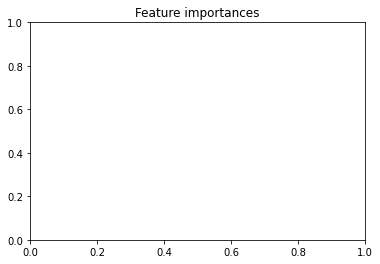

In [702]:
importances = forestbq.feature_importances_
std = np.std([tree.feature_importances_ for tree in forestbq.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [737]:
df.og.mean(), df.fg.mean(), df.abv.mean(), df.srm.mean(), df.ibu.mean(), df.hopcmp.mean()

(1.062608801858081,
 1.0145233461476855,
 6.231271652573681,
 13.537673704248506,
 44.43336416786802,
 35.467595707192054)

ValueError: No axis named 10 for object type Series